In [1]:
from langkit import llm_metrics, extract
import re
import json
import time
import pandas as pd
headers_openllm = {"Content-Type": "application/json", "Accept": "application/json","AUTHORIZATION": "eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJ4WTdTd3k5UE1xaXRDQmNSMm5qcVl6bmoxS3NqZzV3TmdOV0xDVzdyUkhvIn0.eyJleHAiOjE3MzA4ODM3MzgsImlhdCI6MTY5OTI2MTMzOCwiYXV0aF90aW1lIjoxNjk5MjUyMDQ0LCJqdGkiOiJmN2EzMzQwYy1kNDQwLTRlMzUtYjk2ZS04YzBiMTc0Y2RhODAiLCJpc3MiOiJodHRwczovL3JlZnJhY3QtbG9naW4uZm9zZm9yLmNvbS9hdXRoL3JlYWxtcy9tb3NhaWMiLCJhdWQiOlsibW9zYWljLWdhdGVrZWVwZXIiLCJhY2NvdW50Il0sInN1YiI6IjZjMjU4MWU3LWZmMTItNDljNy04MDJmLWI2ZjQzOWQxZDIwMSIsInR5cCI6IkJlYXJlciIsImF6cCI6Im1vc2FpYy1nYXRla2VlcGVyIiwic2Vzc2lvbl9zdGF0ZSI6IjBhY2Y3YWZhLTVmMzMtNGRhZS05OGM3LTQyZDQwYTdlZTM2NiIsImFsbG93ZWQtb3JpZ2lucyI6WyIqIl0sInJlYWxtX2FjY2VzcyI6eyJyb2xlcyI6WyJNTE9QUyIsImxvbmdfbGl2ZWRfdG9rZW4iLCJzcGVjdHJhLWRldmVsb3BlciIsImRlZmF1bHQtcm9sZXMtbW9zYWljIiwicmVmcmFjdC1kZXZlbG9wZXIiLCJvZmZsaW5lX2FjY2VzcyIsImFkbWluIiwidW1hX2F1dGhvcml6YXRpb24iLCJyZWZyYWN0LWFkbWluIl19LCJyZXNvdXJjZV9hY2Nlc3MiOnsiYWNjb3VudCI6eyJyb2xlcyI6WyJtYW5hZ2UtYWNjb3VudCIsIm1hbmFnZS1hY2NvdW50LWxpbmtzIiwidmlldy1wcm9maWxlIl19fSwic2NvcGUiOiJvcGVuaWQgZW1haWwgcHJvZmlsZSIsInNpZCI6IjBhY2Y3YWZhLTVmMzMtNGRhZS05OGM3LTQyZDQwYTdlZTM2NiIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJuYW1lIjoiUmVmcmFjdCBCRlNJIiwicHJlZmVycmVkX3VzZXJuYW1lIjoicmVmcmFjdC5iZnNpQGZvc2Zvci5jb20iLCJnaXZlbl9uYW1lIjoiUmVmcmFjdCIsImZhbWlseV9uYW1lIjoiQkZTSSIsImVtYWlsIjoicmVmcmFjdC5iZnNpQGZvc2Zvci5jb20ifQ.b6SYLgjo9Veo3GmJ8eZjCTNupQjpfMhzsoXdYjWwRtvRnNjBfx0gOqcugO9OcGn-mm8wwpSGI5uiL30-I6SdWBjsf1ur6GztoX7j-nP_3SrJJn3UhNNqIO8LbsPi5gGRTzWtnfjz92BF1YaCXxQwPY0P_aa8vJ6JxZz5Uctn9aIPIJZZnnjC_GPXtXurmshM_tEN2kwCjhEyr7wYzRqUoMtBGfpLjZREBzgZY-x6JyYiXNtycb1d6PFcCXf7nJVV8ienEC_x7OuciDzfeqd-SQnImvAHH7rqFdi9smBN08AbkDS2uAbMrokHrmbiBpaimrR013VwCWz2KL5QYlWleA"}
url_openllm = 'https://refract.fosfor.com/vllm/mistral/v1/completions'

ModuleNotFoundError: No module named 'langkit'

In [3]:
!pip install langkit[all]

  Using cached https://files.pythonhosted.org/packages/1a/e6/c7e550831ee412cad8b7abc6b664cd6e37b67acd40f0824010b07606e2ce/langkit-0.0.31-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e2/4f/58919358958405bea12f3dbf3b0567b48915998f2bf3309ba95cfe53fde0/whylogs-1.3.25-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f8/7f/5b047effafbdd34e52c9e2d7e44f729a0655efafb22198c45cf692cdc157/pandas-2.0.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d8/33/302083f47386d651e4b42923f5206eeb9ee0545ea94bb506324d05fd2274/textstat-0.7.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a9/cc/f2bbce0ad52e09cd1aecb724af06385021b42a7317cd5938ba9c8581509d/openai-1.13.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/df/38/550844e8a797cd8101ea6b3911a0222ba9d02938ea4ea5bd7c08ea84f1b7/presidio_analyzer-2.2.353-py3-none-any.whl
  Using cached https://files

  Using cached https://files.pythonhosted.org/packages/b6/9f/c64c03f49d6fbc56196664d05dba14e3a561038a81a638eeb47f4d4cfd48/nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/ad/30/2281c062222dc39328843bd1ddd30ff3005ef8e30b2fd09c4d2792766061/fsspec-2024.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7e/00/6b218edd739ecfc60524e585ba8e6b00554dd908de2c9c66c1af3e44e18d/nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/44/31/4890b1c9abc496303412947fc7dcea3d14861720642b49e8ceed89636705/nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/7f/fc/1c97813debad858dde5b84b5a8d4ea4077044a7b26e1ad8de9689af93565/triton-2.2.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/81/54/84d42a0bee35edba99dee7b59a8d4970eccdd44

  Using cached https://files.pythonhosted.org/packages/3d/09/d82fe4a34c5f0585f9ea1df090e2a71eb9bb1e469723053e1ee9f57c16f3/charset_normalizer-3.3.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d9/5a/e7c31adbe875f2abbb91bd84cf2dc52d792b5a01506781dbcf25c91daf11/six-1.16.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/eb/20/c44de400d4906f75c11e8e447d1dba24ee7273fec02073686af8866f6e38/pydantic_core-2.16.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/28/78/d31230046e58c207284c6b2c4e8d96e6d3cb4e52354721b944d3e1ee4aa5/annotated_types-0.6.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2c/93/13f25f2f78646bab97aee7680821e30bd85b2ff0fc45d5fdf5393b79716d/httpcore-1.0.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b8/9a/5028fd52db10e600f1c4674441b968cf2ea4959085bfb5b99fb1250e5f68/excep

  Using cached https://files.pythonhosted.org/packages/9e/c3/059298687310d527a58bb01f3b1965787ee3b40dce76752eda8b44e9a2c5/pexpect-4.9.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/95/04/ff642e65ad6b90db43e668d70ffb6736436c7ce41fcc549f4e9472234127/h11-0.14.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0f/6e/45b57a7d4573d85d0b0a39d99673dc1f5eea9d92a1a4603b35e968fbf89a/cloudpathlib-0.16.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/39/78/f9d18da7b979a2e6007bfcea2f3c8cc02ed210538ae1ce7e69092aed7b18/confection-0.1.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9d/42/d233ec75bc8682e368e96073703f01dc095792019fcb541e741b28ce4074/blis-0.7.11-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/2b/27/77f9d5684e6bce929f5cfe18d6cfbe5133013c06cb2fbf5933670e60761d/pure_eval-0.2.2-py3-none-any.whl
  Using cached https://files.pyt

In [3]:
!pip install matplotlib

     |████████████████████████████████| 9.2MB 6.4MB/s eta 0:00:01
     |████████████████████████████████| 307kB 103.0MB/s eta 0:00:01
     |████████████████████████████████| 1.2MB 108.6MB/s eta 0:00:01
     |████████████████████████████████| 4.7MB 106.1MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/12/88/903575f44935c52cab474e14841931edba91f282db4a665ffd6f08b32457/pillow-10.2.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/98/5d/5738903efe0ecb73e51eb44feafba32bdba2081263d40c5043568ff60faf/numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/ec/57/56b9bcc3c9c6a792fcbaf139543cee77261f3651ca9da0c93f5c1221264b/python_dateutil-2.9.0.post0-py2.py3-none-any.whl
     |████████████████████████████████| 112kB 115.7MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/49/df/1fceb2f8900f8639e278b056416d49134fb8d84c5942f

In [3]:
def narrative_generation_with_openllm(intermediate_result, question):
  
  data_openllm = {"prompt": prompt,
                  "max_tokens": 200,
                  "temperature": 0.01,
                  "model": "/llmmodels/NLG_FINETUNEDMODELS/DATASET_MODELS/FINETUNED_MISTRALV2_V5/MISTRAL_MERGED_MODEL_JAN30_V3_0021",
                  "stop": "["}
  start = time.time()
  response = requests.post(url_openllm, json=data_openllm, headers=headers_openllm)
  end = time.time()
  open_llm_narrative_json = json.loads(response.text)
  open_llm_narrative = re.search(r'\n([^|\n]*)', open_llm_narrative_json["choices"][0]["text"]).group(1)
  open_llm_response_time = str(end - start) + str(" seconds")
  output_dict = {}
  output_dict = {
    "opensource_llm_narrative":open_llm_narrative,
    "opensource_llm_response_time":open_llm_response_time
  }
  return output_dict

In [3]:
question = input("Enter the question")
intermediate_result = input("Enter the intermediate_result")
prompt = """Given the input :\n"""+str(intermediate_result)+"""\nAnd the query: """+ str(question)+"""\n is converted into below narrative.\n[Narrative]"""
#Prompt validation
data = [[question,""]]
prompt_response = pd.DataFrame(data, columns=['prompt', 'response'])
metrics_df = extract(prompt_response)

print("\n\nPrompt Metrices")

print("toxicity level of prompt:" , metrics_df['prompt.toxicity'].values[0])
print("Patterns in prompt:" , metrics_df['prompt.has_patterns'].values[0])
print("Sentiment level of prompt:" , metrics_df['prompt.sentiment_nltk'].values[0])
print("flesch_reading_ease of prompt:" , metrics_df['prompt.flesch_reading_ease'].values[0])
print("automated_readability_index of prompt:" , metrics_df['prompt.automated_readability_index'].values[0])
print("aggregate_reading_level of prompt:" , metrics_df['prompt.aggregate_reading_level'].values[0])
print("syllable_count of prompt:" , metrics_df['prompt.syllable_count'].values[0])
print("lexicon_count of prompt:" , metrics_df['prompt.lexicon_count'].values[0])
print("sentence_count of prompt:" , metrics_df['prompt.sentence_count'].values[0])
print("character_count of prompt:" , metrics_df['prompt.character_count'].values[0])
print("polysyllable_count of prompt:" , metrics_df['prompt.polysyllable_count'].values[0])
print("monosyllable_count of prompt:" , metrics_df['prompt.monosyllable_count'].values[0])
print("difficult_words of prompt:" , metrics_df['prompt.difficult_words'].values[0])
print("jailbreak_similarity of prompt:" , metrics_df['prompt.jailbreak_similarity'].values[0])

output_dict = narrative_generation_with_openllm(intermediate_result,question)


print("\n",output_dict['opensource_llm_narrative'],"\n")

data = [[question,output_dict['opensource_llm_narrative']]]
prompt_response = pd.DataFrame(data, columns=['prompt', 'response'])
metrics_df = extract(prompt_response)

print("\n\nResponse Metrices")
print("Time taken" , output_dict["opensource_llm_response_time"])
print("toxicity level of response:" , metrics_df['response.toxicity'].values[0])
print("Patterns in response:" , metrics_df['response.has_patterns'].values[0])
print("Sentiment level of response:" , metrics_df['response.sentiment_nltk'].values[0])
print("flesch_reading_ease of response:" , metrics_df['response.flesch_reading_ease'].values[0])
print("automated_readability_index of response:" , metrics_df['response.automated_readability_index'].values[0])
print("aggregate_reading_level of response:" , metrics_df['response.aggregate_reading_level'].values[0])
print("syllable_count of response:" , metrics_df['response.syllable_count'].values[0])
print("lexicon_count of response:" , metrics_df['response.lexicon_count'].values[0])
print("sentence_count of response:" , metrics_df['response.sentence_count'].values[0])
print("character_count of response:" , metrics_df['response.character_count'].values[0])
print("polysyllable_count of response:" , metrics_df['response.polysyllable_count'].values[0])
print("monosyllable_count of response:" , metrics_df['response.monosyllable_count'].values[0])
print("difficult_words of response:" , metrics_df['response.difficult_words'].values[0])
print("refusal_similarity of response:" , metrics_df['response.refusal_similarity'].values[0])
print("relevance_to_prompt of response:" , metrics_df['response.relevance_to_prompt'].values[0])

Enter the questiontrend of sales across market in 2021
Enter the intermediate_result{'Date_Interval': 'month', 'Latest_period': '2021-12-01', 'Total_Latest_Value': 200609.99, 'Latest_Period_Constant_Measures': False, 'Latest_Top1': ['APAC'], 'Latest_Top1_Values': [53514.51], 'Latest_Top2': ['US'], 'Latest_Top2_Values': [47591.55], 'Latest_Bottom1': ['Canada'], 'Latest_Bottom1_Values': [270.6], 'Negative_present': False, 'Measure': [{'label': 'Sales', 'variable': 'Sales', 'type': 'measure', 'alternate_usage': ['Sales'], 'isRegional': False, 'number_type': 'add_values'}], 'Dimension': [{'label': 'Order Date', 'variable': 'Order Date', 'type': 'dimension', 'alternate_usage': ['Order Date'], 'isRegional': False, 'singular': 'Order Date', 'plural': 'Order Dates'}, {'label': 'Market', 'variable': 'Market', 'type': 'dimension', 'alternate_usage': ['Market'], 'isRegional': False, 'singular': 'Market', 'plural': 'Markets'}], 'Dimension_1_len': 12, 'Dimension_2_len': 7, 'Filter': {'Order Date': 

/tmp/pip_packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/tmp/pip_packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(




Prompt Metrices
toxicity level of prompt: 0.000747978687286377
Patterns in prompt: None
Sentiment level of prompt: 0.0
flesch_reading_ease of prompt: 106.67
automated_readability_index of prompt: 2.3
aggregate_reading_level of prompt: 3.0
syllable_count of prompt: 8
lexicon_count of prompt: 7
sentence_count of prompt: 1
character_count of prompt: 30
polysyllable_count of prompt: 0
monosyllable_count of prompt: 6
difficult_words of prompt: 0
jailbreak_similarity of prompt: 0.0957024097442627


NameError: name 'narrative_generation_with_openllm' is not defined

In [2]:
from langkit import extract, pii,llm_metrics,injections
import pandas as pd


#For default dataset

'''
from langkit.whylogs.samples import load_chats
dataObject = load_chats()
enhanced_df = extract(dataObject)
'''

#For custom dataset
dataObject =  pd.read_csv("/data/NLG_FILES/NLG_PROMPT_RESPONSE_V1.csv")
enhanced_df = extract(dataObject)
enhanced_df.insert(0, 'New_ID', range(0,len(enhanced_df)))
print(enhanced_df.columns)
enhanced_df

/tmp/pip_packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/tmp/pip_packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Index(['New_ID', 'prompt', 'response', 'prompt.has_patterns',
       'response.has_patterns', 'prompt.sentiment_nltk',
       'response.sentiment_nltk', 'prompt.flesch_reading_ease',
       'response.flesch_reading_ease', 'prompt.automated_readability_index',
       'response.automated_readability_index',
       'prompt.aggregate_reading_level', 'response.aggregate_reading_level',
       'prompt.syllable_count', 'response.syllable_count',
       'prompt.lexicon_count', 'response.lexicon_count',
       'prompt.sentence_count', 'response.sentence_count',
       'prompt.character_count', 'response.character_count',
       'prompt.letter_count', 'response.letter_count',
       'prompt.polysyllable_count', 'response.polysyllable_count',
       'prompt.monosyllable_count', 'response.monosyllable_count',
       'prompt.difficult_words', 'response.difficult_words',
       'prompt.jailbreak_similarity', 'response.refusal_similarity',
       'prompt.toxicity', 'response.toxicity', 'response.rele

,New_ID,prompt,response,prompt.has_patterns,response.has_patterns,prompt.sentiment_nltk,response.sentiment_nltk,prompt.flesch_reading_ease,response.flesch_reading_ease,prompt.automated_readability_index,...,prompt.jailbreak_similarity,response.refusal_similarity,prompt.toxicity,response.toxicity,response.relevance_to_prompt,prompt.pii_presidio.result,prompt.pii_presidio.entities_count,response.pii_presidio.result,response.pii_presidio.entities_count,prompt.injection
0,0,monthly trend of sales across market in 2021,"Across Markets, the Sales stands at 200.61K in...",None,None,0.0000,0.0000,88.74,99.23,4.4,...,0.071328,0.043553,0.000754,0.000748,0.522173,[],0,"[{""type"": ""URL"", ""start"": ""112"", ""end"": ""120"",...",1,0.322700
1,1,Sales across category across market in 2021 ex...,"For all Countries except India, across Markets...",None,None,0.0000,-0.3818,53.88,69.48,8.2,...,0.032001,-0.014867,0.000752,0.000740,0.504791,[],0,[],0,0.306634
2,2,Growth rate of arpu and fc,"As of the last month, Delta stands at -19.37, ...",None,None,0.3818,0.3818,116.15,95.67,-2.0,...,0.060511,0.047254,0.000925,0.000796,0.640120,[],0,"[{""type"": ""URL"", ""start"": ""104"", ""end"": ""113"",...",1,0.229181
3,3,growth rate of horlicks average price across m...,"As of the last month, Value Offtake(000 Rs) st...",None,None,0.3818,0.2960,80.28,87.72,8.5,...,0.010675,0.041194,0.001066,0.000813,0.575645,[],0,[],0,0.217345
4,4,contribution to growth in profit by regions ac...,Oceania leads in contributing to growth of Pro...,None,None,0.6705,0.7430,68.77,78.45,7.6,...,0.091320,0.077707,0.000779,0.000739,0.638710,[],0,[],0,0.323985
5,5,how many countries with profit greater than 10...,"For all Regions except India, across Sub-Categ...",None,None,0.6597,0.9260,64.71,55.30,9.9,...,0.073691,0.030717,0.000851,0.000772,0.726003,[],0,"[{""type"": ""URL"", ""start"": ""146"", ""end"": ""154"",...",1,0.300294
6,6,how many countries with profit greater than 10...,"In September 2023, across Sub-Category and Cou...",None,None,0.6597,0.9186,66.74,53.88,8.6,...,0.057542,0.015910,0.000813,0.000741,0.592841,[],0,"[{""type"": ""URL"", ""start"": ""117"", ""end"": ""125"",...",2,0.311334
7,7,kda for sales across months,The only significant driver is Discount(100).,None,None,0.0000,0.2023,117.16,14.63,2.7,...,0.071905,0.111449,0.000931,0.000748,0.149459,[],0,[],0,0.314720
8,8,list the segments having sales greater than 1k...,There are 3 Segments with Sales greater than 1...,None,None,0.3612,0.3612,94.15,107.69,4.2,...,0.117016,0.051736,0.000849,0.000785,0.826674,"[{""type"": ""US_DRIVER_LICENSE"", ""start"": ""50"", ...",1,"[{""type"": ""US_DRIVER_LICENSE"", ""start"": ""54"", ...",1,0.297060
9,9,list of category and regions with less than 10...,List of Regions with arpu greater than 1.00K: ...,None,None,0.0000,0.3612,75.20,98.21,6.1,...,0.085337,0.090971,0.000796,0.000758,0.392402,[],0,[],0,0.346884


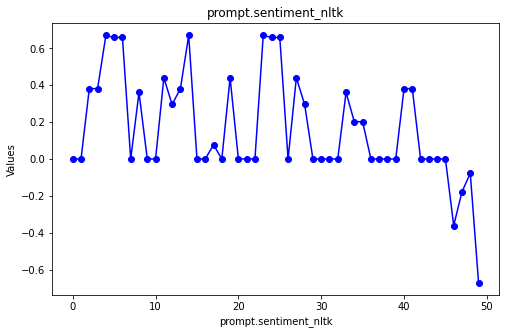

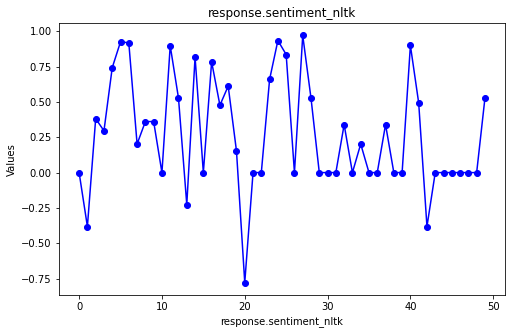

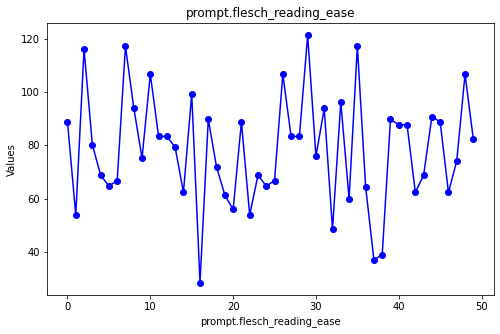

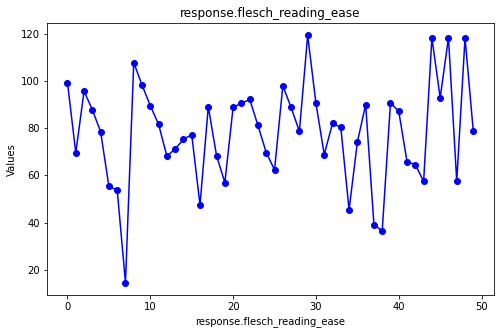

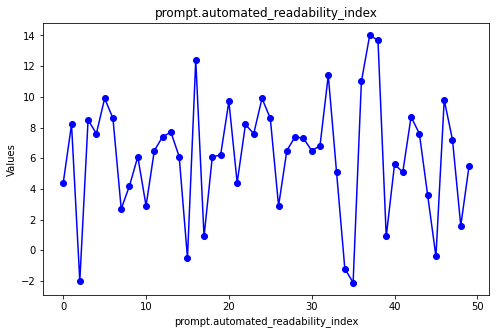

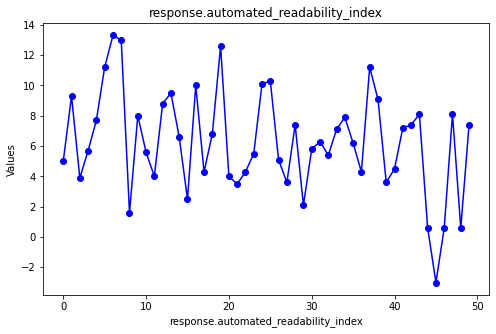

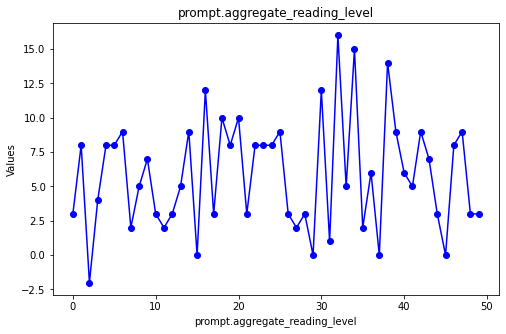

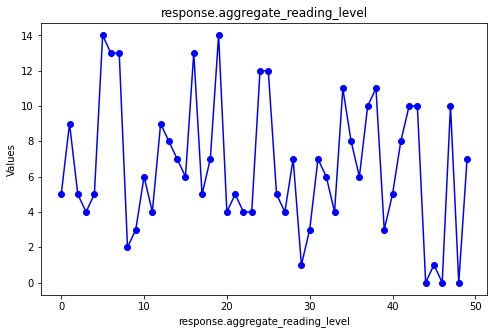

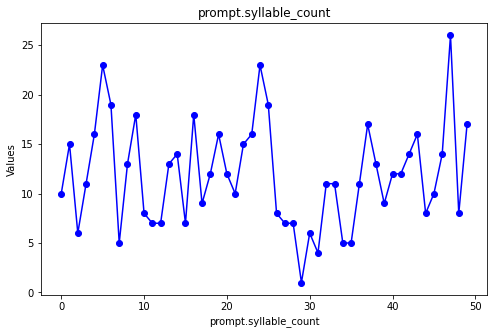

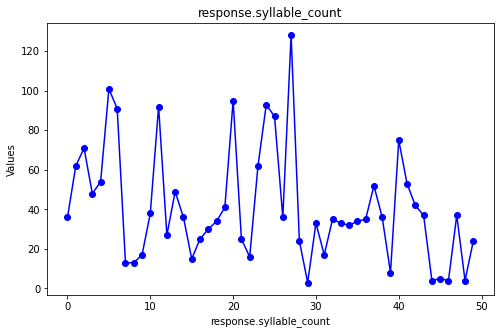

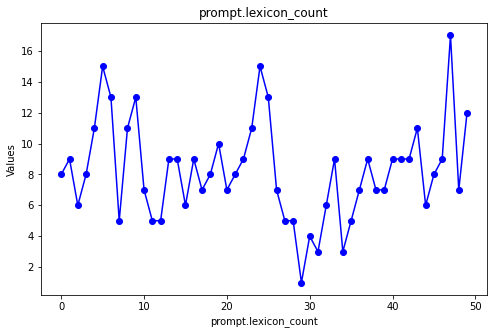

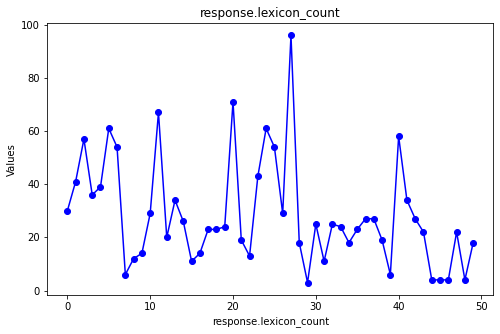

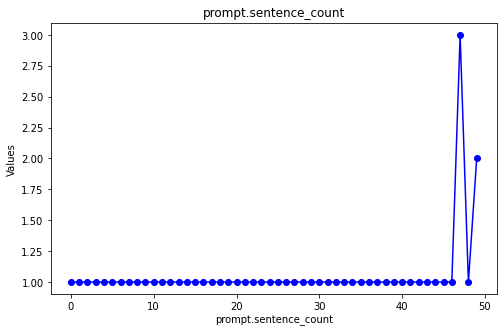

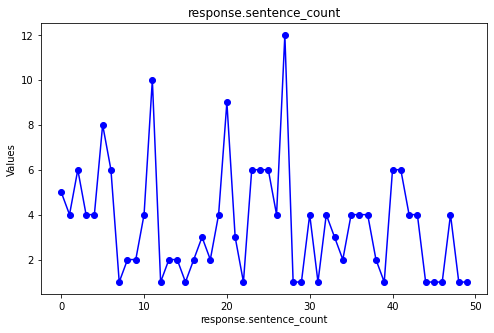

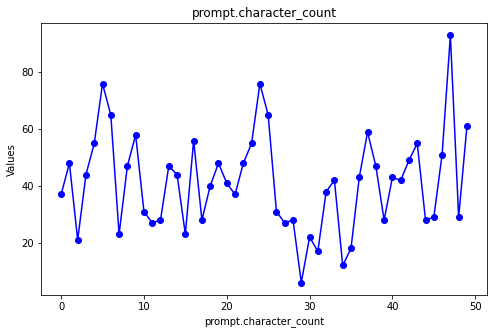

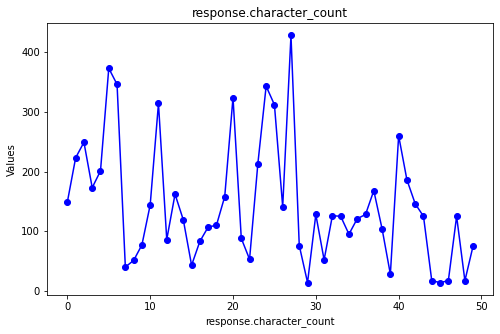

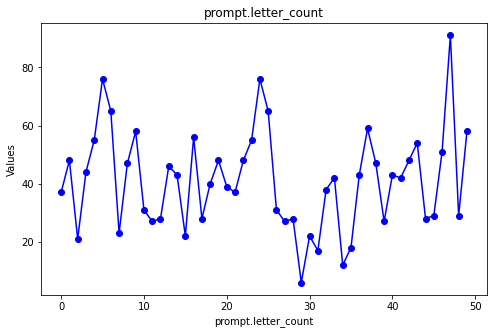

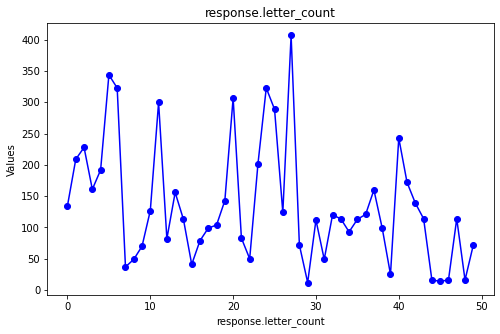

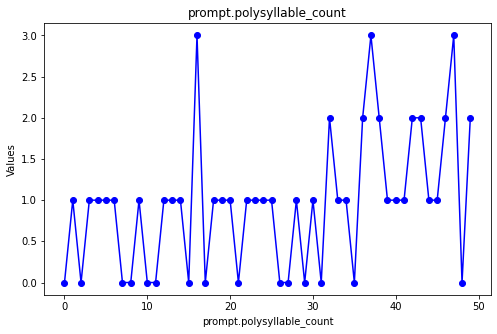

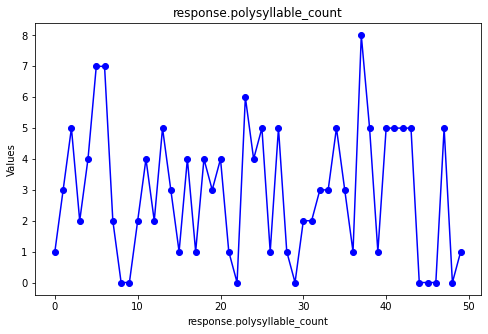

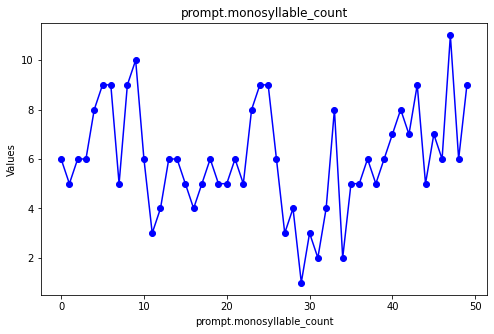

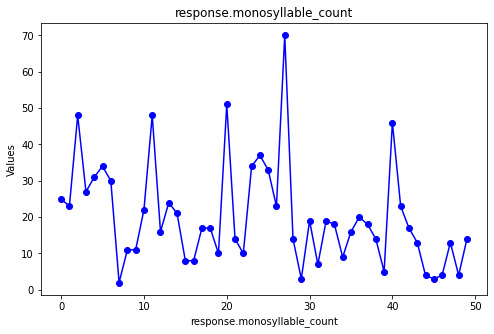

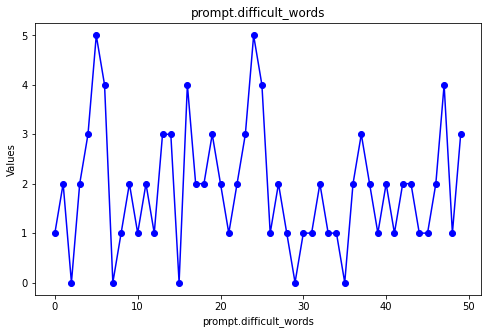

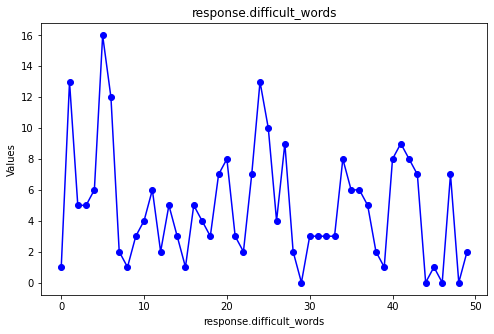

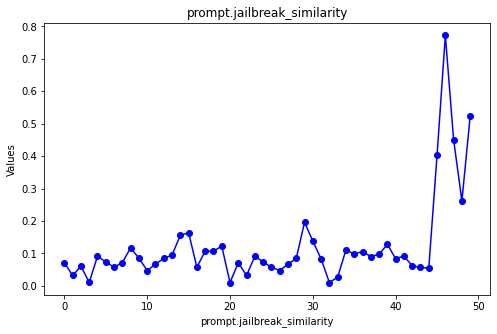

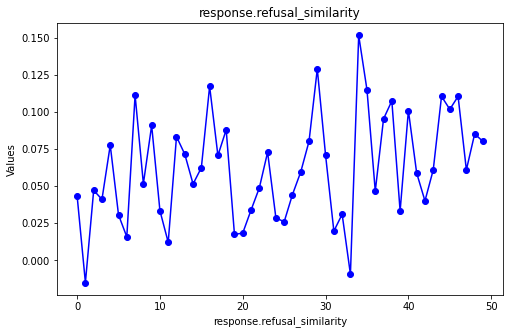

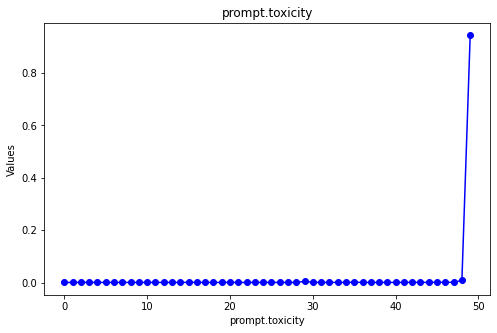

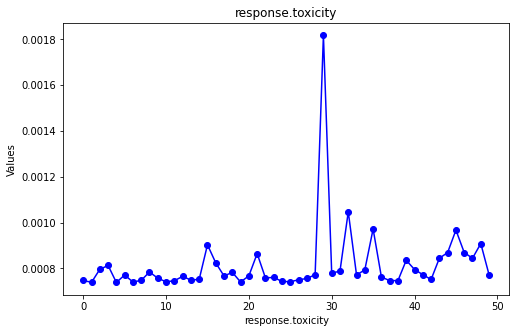

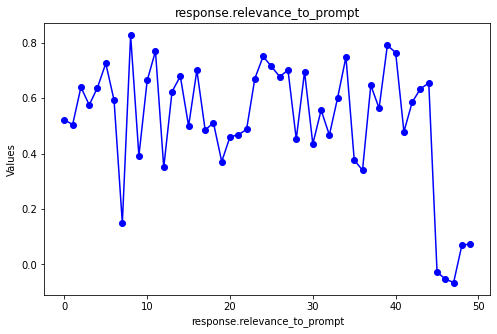

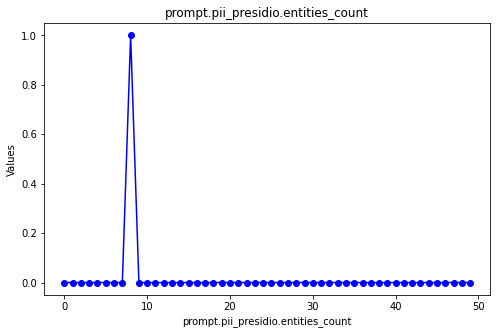

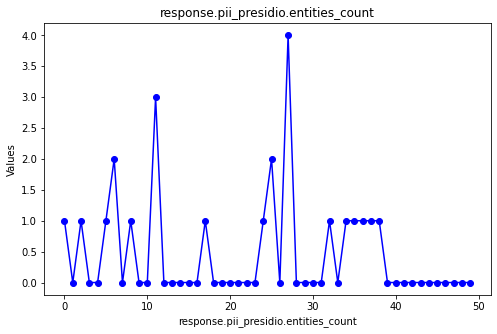

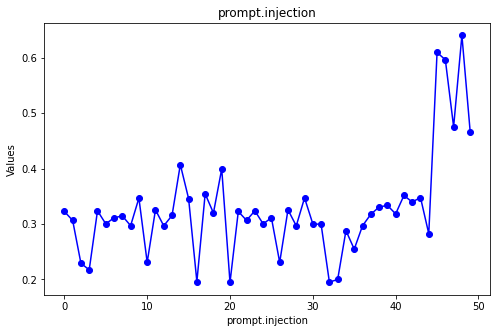

In [11]:
import matplotlib.pyplot as plt
for each_column in enhanced_df.columns:
    if(enhanced_df[each_column].dtype != 'object' and each_column!='New_ID'):
        plt.figure(figsize=(8, 5))
        plt.plot(enhanced_df['New_ID'], enhanced_df[each_column], marker='o', linestyle='-', color='b')
        plt.xlabel(each_column)
        plt.ylabel('Values')
        plt.title(each_column)
        plt.show()

In [ ]:
import random
fig, axs = plt.subplots(6, 5, figsize=(30, 20))
original_columns = list(enhanced_df.columns)
selected_columns = []
for each_r in range(0,6):
    for each_c in range(0,5):
        available_columns = [each_column for each_column in original_columns if each_column not in selected_columns and each_column !='New_ID' and enhanced_df[each_column].dtype != 'object']
        current_column = random.choice(available_columns)
        selected_columns.append(current_column)
        axs[each_r, each_c].plot(enhanced_df['New_ID'], enhanced_df[current_column], marker='o', linestyle='-', color='b')
        axs[each_r, each_c].set_title(current_column)
plt.tight_layout()
plt.show()

In [3]:
import os
os.environ["AZURE_OPENAI_ENDPOINT"] = "https://lumin-azure-openai-rnd.openai.azure.com/"
os.environ["AZURE_OPENAI_KEY"] = "38002279fa574fbcba0fbc424ae056d5"
os.environ["OPENAI_API_KEY"] = "38002279fa574fbcba0fbc424ae056d5"
from langkit import response_hallucination,extract
from langkit import proactive_injection_detection
from langkit.openai import OpenAIAzure
response_hallucination.init(llm=OpenAIAzure(engine="lumin-rnd-gpt-4-32k"), num_samples=1)

[nltk_data] Downloading package punkt to /home/mosaic-ai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/pip_packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/tmp/pip_packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


,prompt,response,prompt.has_patterns,response.has_patterns,prompt.sentiment_nltk,response.sentiment_nltk,prompt.flesch_reading_ease,response.flesch_reading_ease,prompt.automated_readability_index,response.automated_readability_index,...,response.refusal_similarity,prompt.toxicity,response.toxicity,response.relevance_to_prompt,prompt.pii_presidio.result,prompt.pii_presidio.entities_count,response.pii_presidio.result,response.pii_presidio.entities_count,prompt.injection,response.hallucination
0,what is machine learning,branch of artificial intelligence (AI) that \n...,None,None,0.0,0.4767,75.88,24.78,5.3,17.3,...,0.330347,0.001336,0.000962,0.449982,[],0,[],0,0.326987,0.478754


In [11]:
import time
data = [["what is machine learning",
         
         """branch of artificial intelligence (AI) that 
         uses algorithms to teach machines how to perform 
         tasks that humans would otherwise consider impossible"""]]
prompt_response = pd.DataFrame(data, columns=['prompt', 'response'])
s = time.time()
enhanced_df = extract(prompt_response)
e = time.time()
enhanced_df
print(e-s)

/tmp/pip_packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/tmp/pip_packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


12.11655330657959
